# Description (Описание)

    Кластеризация - это метод машинного обучения, который используется для группировки схожих объектов в одни кластеры. Цель кластеризации состоит в том, чтобы разделить данные на группы таким образом, чтобы объекты внутри одного кластера были более похожи друг на друга, чем на объекты из других кластеров. Кластеризация является формой обучения без учителя, поскольку алгоритмы кластеризации обнаруживают структуру данных без заранее известных меток или категорий.
    
     Алгоритмы кластеризации определяют структуры данных, чтобы выделить внутренние группы схожих объектов.

# About Feature (О признаках)

    1. Alcohol (Спиртовое вещество): 
    Процентное содержание алкоголя в вине. Этот параметр измеряет количественное содержание этанола в вине и влияет на его крепость.

    2. Malic Acid (Яблочная кислота):
    Количество яблочной кислоты в вине. Яблочная кислота придает вину свежесть и яркость.

    3. Ash (Зольность):
    Количество минеральных веществ (золы) в вине после испарения воды и сжигания остатков. Он отражает минеральность вина.

    4. Alcalinity of Ash (Щелочность золы): 
    Щелочность золы в вине. Щелочность измеряет pH-уровень вина и влияет на его вкусовые характеристики.

    5. Magnesium (Магний): 
    Количество магния в вине. Магний является одним из микроэлементов, которые могут влиять на вкус и аромат вина.

    6. Total Phenols (Общее количество фенолов): 
    Общее количество фенольных соединений в вине. Фенолы являются антиоксидантами и могут влиять на вкус и цвет вина.

    7. Flavanoids (Флавоноиды): 
    Количество флавоноидов в вине. Флавоноиды также являются фенольными соединениями и могут вносить вклад в вкус и цвет вина, а также обладают антиоксидантными свойствами.

    8. Nonflavanoid Phenols (НЕ флавоноидные фенолы): 
    Количество не флавоноидных фенольных соединений в вине.

    9. Proanthocyanins (Проантоцианидины): 
    Количество проантоцианидинов в вине. Проантоцианидины также относятся к группе фенольных соединений.

    10. Color Intensity (Интенсивность цвета): 
    Интенсивность цвета вина, измеряется как абсорбция света при определенной длине волны. Этот параметр связан с глубиной цвета вина.

    11. Hue (Оттенок): 
    Оттенок вина, измеряется на цветовой шкале. Это значение может варьироваться от оранжевого до фиолетового и связано с цветовой тонкостью вина.

    12. OD280/OD315 of Diluted Wines (Оптическая плотность при разбавленных винах): 
    Оптическая плотность вина при определенной длине волны. Этот параметр может быть связан с содержанием вина антоцианов (пигменты, придающие вину красный цвет).

    13. Proline (Пролин): 
    Количество аминокислоты пролина в вине. Пролин может влиять на текстуру и структуру вина.

### Импорт бибилиотек

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score

In [2]:
bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1,
        'alpha' : 1}

plt.style.use('fivethirtyeight')

### Просмотр набор данных

In [136]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\harrywang\wine-dataset-for-clustering\versions\1


In [128]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

# print("Path to dataset files:", path)

100%|██████████| 21.5k/21.5k [00:00<00:00, 430kB/s]

Extracting files...
Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [137]:
df = pd.read_csv(path + "/wine-clustering.csv")

print(df.shape)
df.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


    Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. В результате анализа было определено количество 13 компонентов, содержащихся в каждом из трех видов вин.

In [5]:
# Информация про набор данных
data = pd.DataFrame()

data.index =  df.columns
data['count_NaN'] = df.isna().sum()
data['dtypes'] = df.dtypes
data['uniq'] = df.nunique()
data['repeat'] = df.shape[0] - data['uniq']
data['shape'] = df.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
Alcohol,0,float64,126,52,178
Malic_Acid,0,float64,133,45,178
Ash,0,float64,79,99,178
Ash_Alcanity,0,float64,63,115,178
Magnesium,0,int64,53,125,178
Total_Phenols,0,float64,97,81,178
Flavanoids,0,float64,132,46,178
Nonflavanoid_Phenols,0,float64,39,139,178
Proanthocyanins,0,float64,101,77,178
Color_Intensity,0,float64,132,46,178


    В данном наборе данных отсутствуют значения NaN, то есть у всех признаков все значения присутствуют. 
    Так же стоит отметить про размерность данного набора данных.
    
    Расзмер состовляет - 178 наблюдений и 13 признаков -> набор данных небольшой, поэтому можно применить иерархическую кластеризацию (для визуализации близости + построим дендрограмму(так же для визуализации) и просмотра количество кластеров), так же применим алгоритм k-means and DBSCAN
    
    count_NaN - количество значений NaN в каждом признаке
    
    dtypes - тип признака
    В данном наборе данных нет категориальных значений, то есть каждый признак (химический анализ) представляет собой непрерывную величины (то есть числовое значение)
    
    uniq - количество уникальных значений в каждом признаке
    
    repeat - количество повторяющихся значений в каждом признаке (то есть дубликаты)
    
    shape - количество значений в каждом признаке

In [6]:
# Описательная статистика по каждой переменной

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


    По данной описательной статистике можно сделать следующие выводы:
    
    1. Обратить внимание стоит на средние значения. Средние значения в каждой переменной разные (то есть какие то средния <1, 
    какие то срадние значения - однозначные числа, 
    какие то средние значения двузначные числа, 
    а какие то средние значения - трехзначные числа
    
    Это означает что мы имеем набор данных с разными диапазонами значений. То есть так как разный химический показатель, скорее всего, измеряется разными значениями (то есть значения лежат в разных диапазонах) при измерении расстояния в алгоритме кластеризации этим значениям может придаваться больший вес -> надо привести данные к одному диапазону (то есть сделать стандартизацию данных), что бы признаки имели один и тот же диапазон -> и все признаков тоже был одинаковый, и расстояние тоже будет расчитываться с одинаковым весом для кажой переменной 
    
    2. Следует обратить внимание на значения max и 75% 
    То есть значения max не сильно далеки от значения 75% -> в данных не особо наблюдаются выбросы, что бы посмотреть более подробно расределениея, построим kdeplot и визуализируем 
   

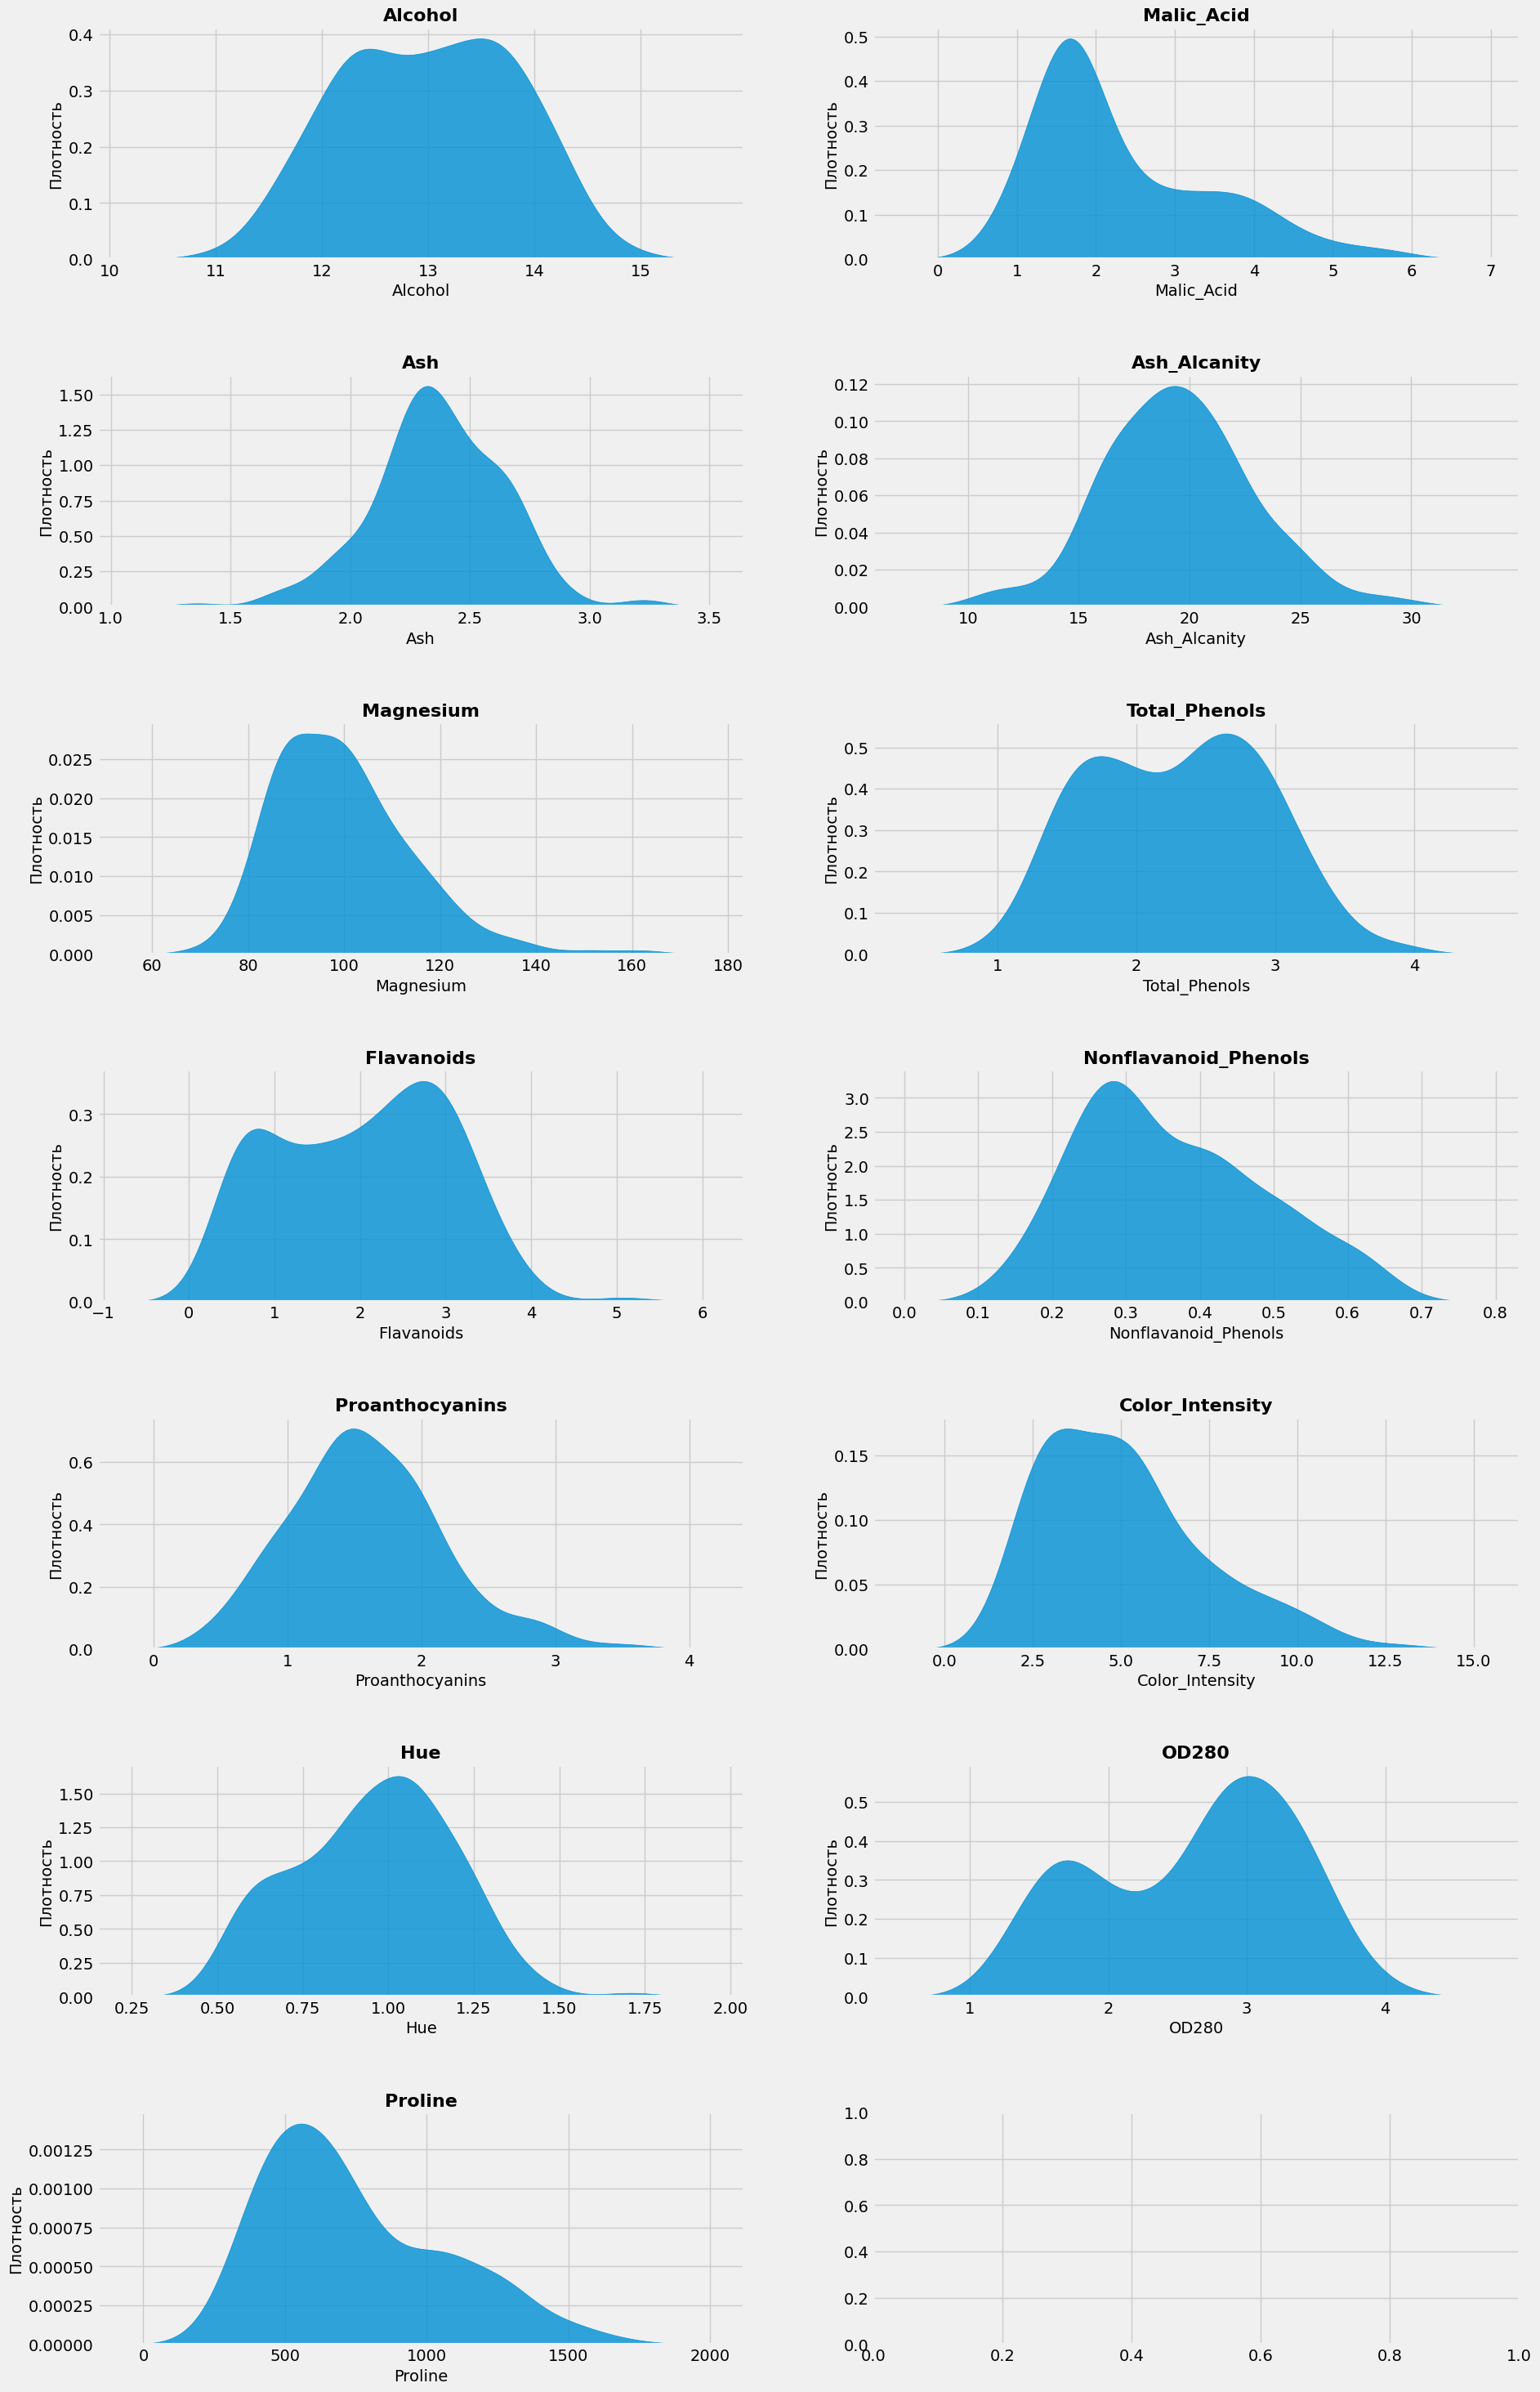

In [7]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

    По данным распределениям можно сделать следующий вывыод:
     1. Примерно все признаки имеют нормальное распределение (то есть близкое к нормальному). Что тут имеется в виду. То есть большинство значений располагается близко к среднему значения признака, но так же есть признаки, которые не обладают данным свойством.
     Например признак Malic_acid - значения данного признака сконцентрированны в диапазоне значений от 0 до 3
     Тоже самое можно наблюдать в признаке Proline и  Color_Intensity
     
     Что значит такой перекос к нижним значениям - это означает что большинство значений в признаке распределяются как раз в данных диапазонах скопления (то есть распределяюсят ближе к минимальному значения) а сущестуют значения, которых меньше (по плотности) и они располагаются ближе к максимуму - это может означать то, что это другой класс, или вид вина, который отличается например более насыщенным цветом или более высоким содержанием какого либо вещества 
     
     Или например у признака OD280 - существует два экстремума (то есть существует 2 диапазона, в которых наблюдается максимальная плотность распределения) - это диапазоны от 1 до 2 и от 2.5 до 4
     То же самое можно наблюдать в признаке Flavanodis и Total_Phenols
     
     Так же на данных распределениях по оси X показаны диапазоны значений данных переменных, и тоже можно заметить, что у некоторых признаков разные диапазоны значений, то есть это то, о чем я говорил выше, данные имеют разный мысштаб и чтобы привести данные к одному масштабу, надо сделать стандартизацию данных
     
     При стандартизации мы не потерям распределение и следовательно сохраним информацию о признаках (по которой будем тренировать модели кластеризации)

### Просмотр взаимосвязи между признаками

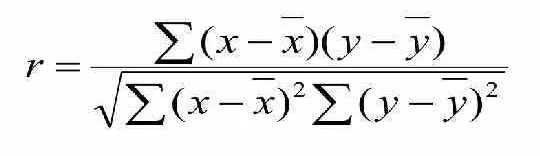

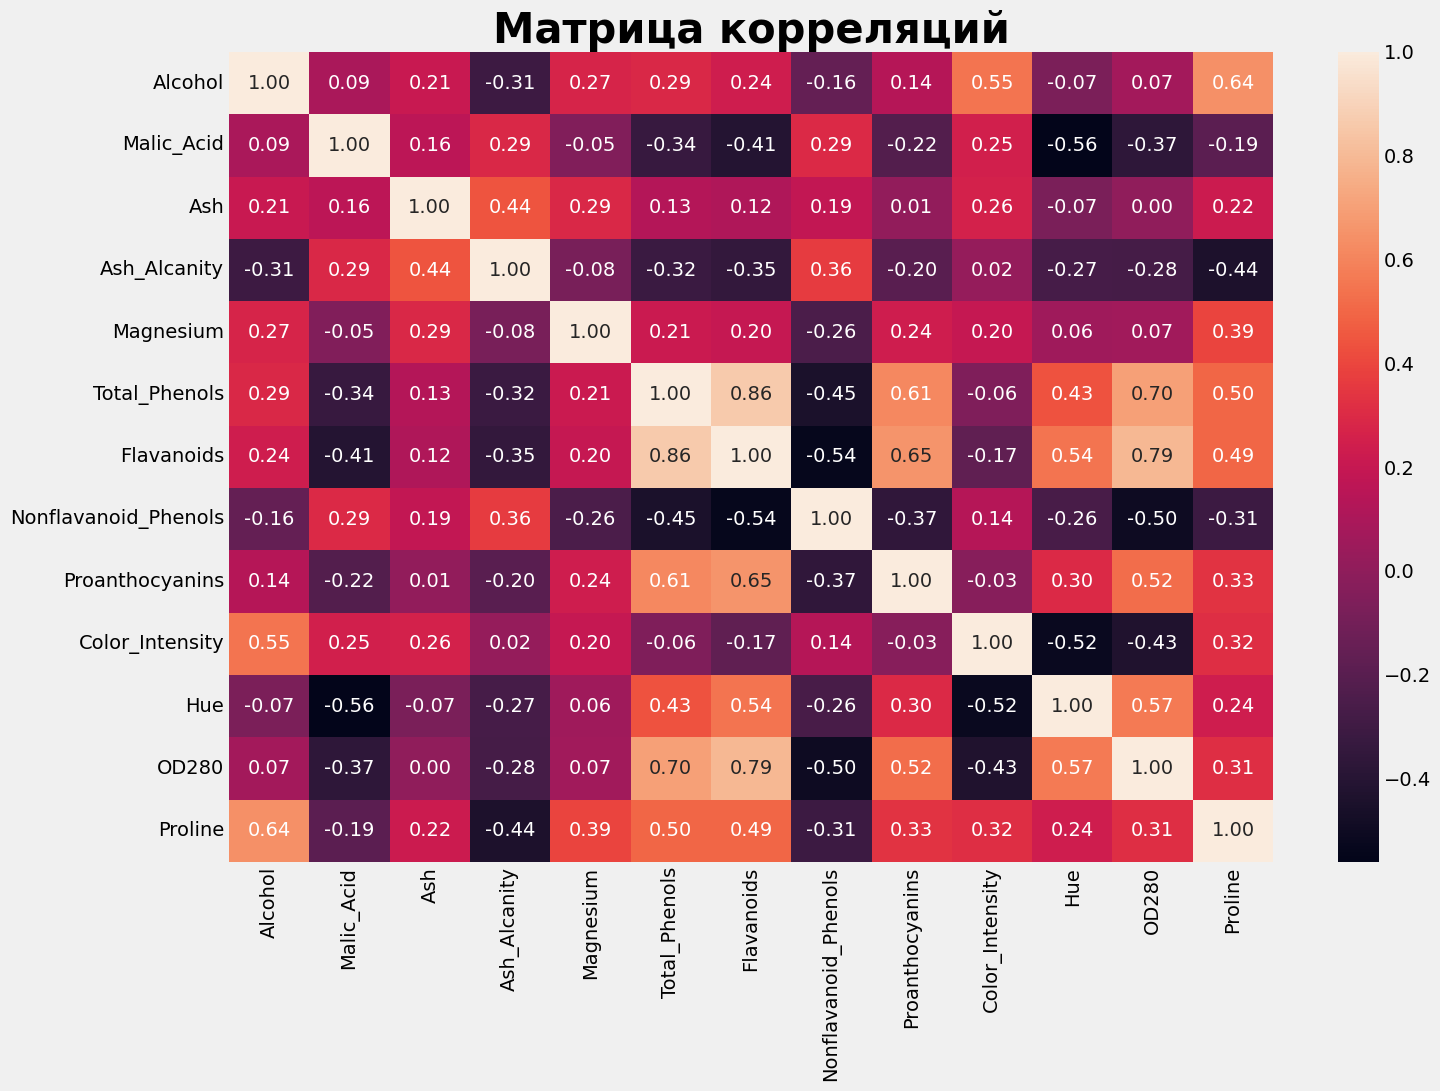

In [8]:
corr  = df.corr()

fig = plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt='.2f')
plt.title('Матрица корреляций', fontsize = 30, fontweight = 'bold')
plt.show()

    Данная матрицы корреляции показывает насколько признаки имеют линейную зависимость (то есть является ли признак линейной комбинацией другого признака или нет)
    
    Самый высокий коэффициент корреляции равен 0,86, то есть при увеличении  Total_Phennols увеличивается Flavanoisd
    
    Так же присутствует отрицательная корреляция между некоторыми признаками (то есть уменьшение одного признака влечет за собой увеличение другого и наоборот)
    
    В целом корреляция между признаками в основном находится в диапазоне от -0,2 до 0,3
    
    Так как в данном наборе отсутствует такое являение как мультиколлинеарность, мы не будем удалять переменные и будем работать с полным набором данных
    
    Так же мы не будем применять PCA, так как в наборе всего 13 признаков и после кластеризации нам потребуется провести анализ кластеров, следовательно, что бы была интерпритация значений мы не будем прибегать к данному методу.

### Стандартизация признаков 

In [9]:
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


    После стандартизации признаков построим модель иерархической кластеризации и выведем дендрограмму, чтобы визуализировать какое количество классов лучше брать 
    
    Иерархическую кластеризацию не будем использовать в качестве основной, с ее помощью мы просто посмотрим количество кластеров и посомтрим какие объекты и как объединяются (какие объекты схожи)

# K-means

    далее мы построим алгоритм k-means, чтобы сравнить результаты работы модели и выбрать лучшую модель (мы так же будем строить DBSCAN, который тоже будет участвовать в сравнительном анализе моделей кластеризации 

### Как работает k-means

    1. Выбираются случайно n кластеров (то есть количество кластеров, которые определяются заранее)
    2. Затем берутся начальные центроиды (количество центроидов равно количеству кластеров, который обозначает пользователь) и эти точки ставяться рандомно 
    3. Группируются начальные точки, относительно расстояния от центроида до каждой точки (то есть как группируются начальные точки. Вычисляется значение от точки до каждого центроида и объект относится к тому кластеру, к которому он ближе (до центроида которого расстояние минимальное относительно других расстояний до других центроидов)
    4. Считается среднее значение в каждом кластере и повторно группируются кластеры на основе средних значений (центроиды теперь это средние значения)
    5. Повторяется до тех пор, пока кластеры не станут меняться 
    
    Когда данные сгруппированы мы смотрим на дисперсию (разброс значений вокруг среднего) внутри каждого кластера, а затем проделываем тоже самое с другими начальными точками
    Алгоритм возвращает столько вариантов кластеризации, сколько пользователь ему обозначает, а потом выбирает лучший вариант из всех

### Выбор оптимального значения количества кластеров (гиперпараметр k)

    Чтобы выбрать оптимальное значение k (количество кластеров) надо что бы в каждом кластере была наименьшая дисперсия (то есть сумма квадратов расстояний между центроидом и объектом должна стремиться к минимуму). В kmeans за эту метрику отвечает inertia которая как раз и измеряет сумму квадратов расстояний между центроидом и объектом каждого кластера 

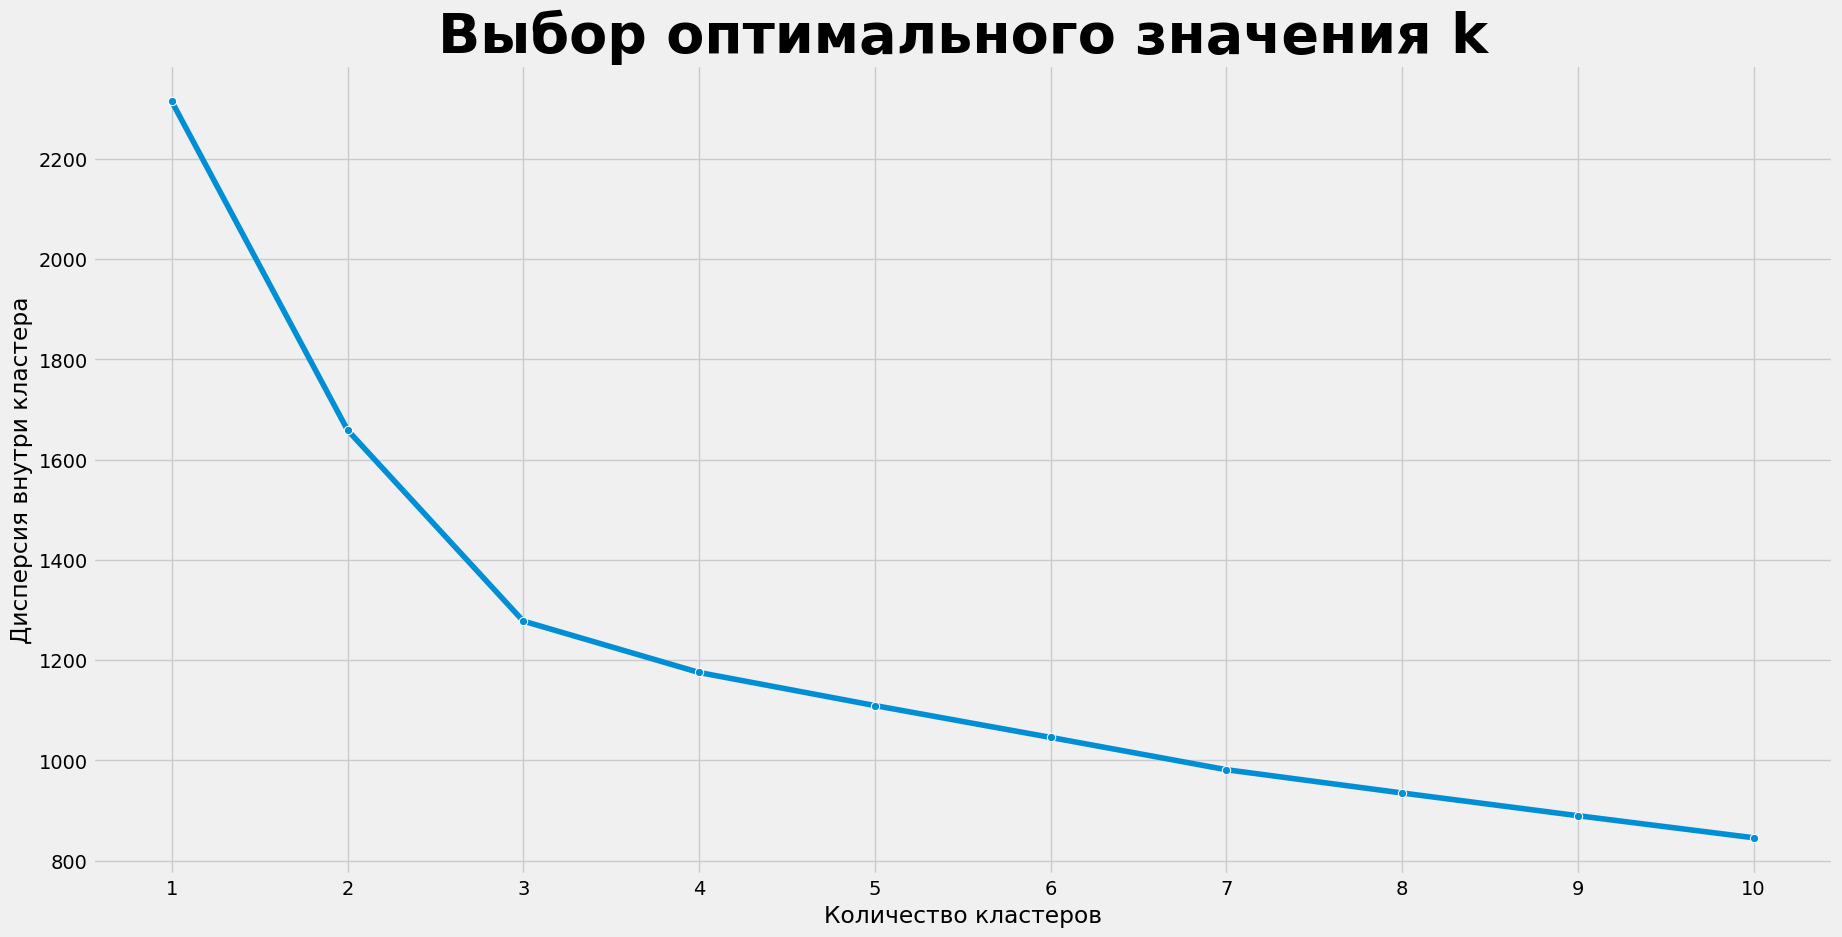

In [10]:
# Список для записи дисперсии
inertia_score = []

# Тренировка модели кластеризации с разным параметром k 
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df)
    inertia_score.append(kmeans.inertia_)
    
# Построение графика    
fig = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1,11),
             y = inertia_score,
             marker = 'o')
plt.title('Выбор оптимального значения k', fontsize = 40, fontweight = 'bold')
plt.xlabel('Количество кластеров')
plt.ylabel('Дисперсия внутри кластера')
plt.xticks(range(1,11))

plt.show()

    После поcтроения данного графика можно скзаать что лучше разделять данный набор данных на 3 кластера (+ так же можно обратиться к дендрограмме, которая тоже показывает, что делить лучше на 3 кластера, поэтому так как мы ориентировались на деньдрограмму издесь тоже существует явное уменьшение дисперсии внутри кластера при значениях 1 2 и 3, а дальшедисперсия уменьшается незначительно (то есть маленькими шагами)
    Следоватьельно здесь мы тоже будем использовать в качетсве гиперпараметра k(количество кластеров) значение = 3

### Построение модели KMeans

In [11]:
kmeans = KMeans(n_clusters = 3,
                n_init = 10,
                algorithm = 'elkan')

kmeans.fit(df)

KMeans(algorithm='elkan', n_clusters=3, n_init=10)

     Гиперпараметры:
     algorithm = 'elkan' - метрика оценки расстояния - Евклидово расстояния
     n_init = 10 - количество сколько раз строится кластеризация (количество начальных положений центроидов)
     n_clusters = 3 - количество кластеров = 3

In [12]:
# Метки класстеров
labels = kmeans.labels_

# Центроиды для каждого кластера
centroids = kmeans.cluster_centers_

labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Метрика kmeans

In [13]:
silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Силуэт 0.285
Variance Rarion Criterion 70.94


    Лучше всего сработал алгоритм KMeans - следовательно присвоим каждому объекту метки рузальтата алгоритма KMeans и проанализируем каждый кластер и выделим его основные свойства и отличия 

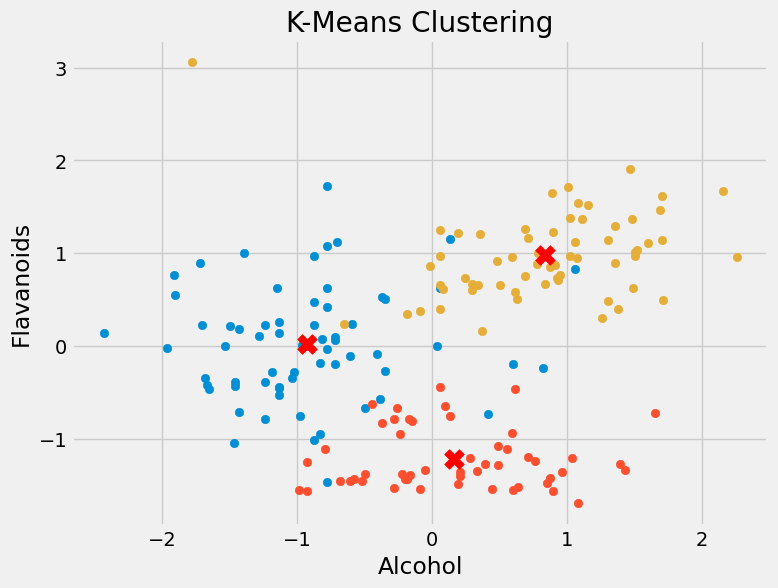

In [14]:
# Визуализация данных и центров кластеров
plt.figure(figsize=(8, 6))

# Визуализируем данные по кластерам
for i in range(3):
    plt.scatter(df.iloc[labels == i, 0], df.iloc[labels == i, 6])

# Визуализируем центры кластеров
plt.scatter(centroids[:, 0], centroids[:, 6], marker='X', s=200, color='red')

plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('K-Means Clustering')
plt.show()

### Возвращаемся к исходному набору данных

    Что бы интерпретировать и проанализировать наши резульаты, мы сделаем операцию, обратную к стандартизации (то есть домножим на стандартное отклонение и прибавим среднее значение к каждому объекту выборки) и после этого получим нащ исходных набор данных
    
    Но в StandartScaler есть встроенный метод, поэтому мы воспользуемся им 

In [15]:
columns = df.columns
df[columns] = scaler.inverse_transform(df[columns])
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


    Мы вернули наш исходный набор данных и теперь добавим метку для каждого объекта, что бы проанализировать различия между кластерами 

In [16]:
data_labels = pd.DataFrame()

In [17]:
data_labels['KMeans'] = labels
data_labels.sample(10)

,KMeans
121,2
110,0
146,1
149,1
114,0
48,2
19,2
95,2
7,2
84,0


In [18]:
metka = data_labels['KMeans']
df['Label'] = metka

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


In [ ]:
adjusted_rand_score(df['Label'], y)

# Анализ каждого кластера

### Построим распределения по каждому кластеру

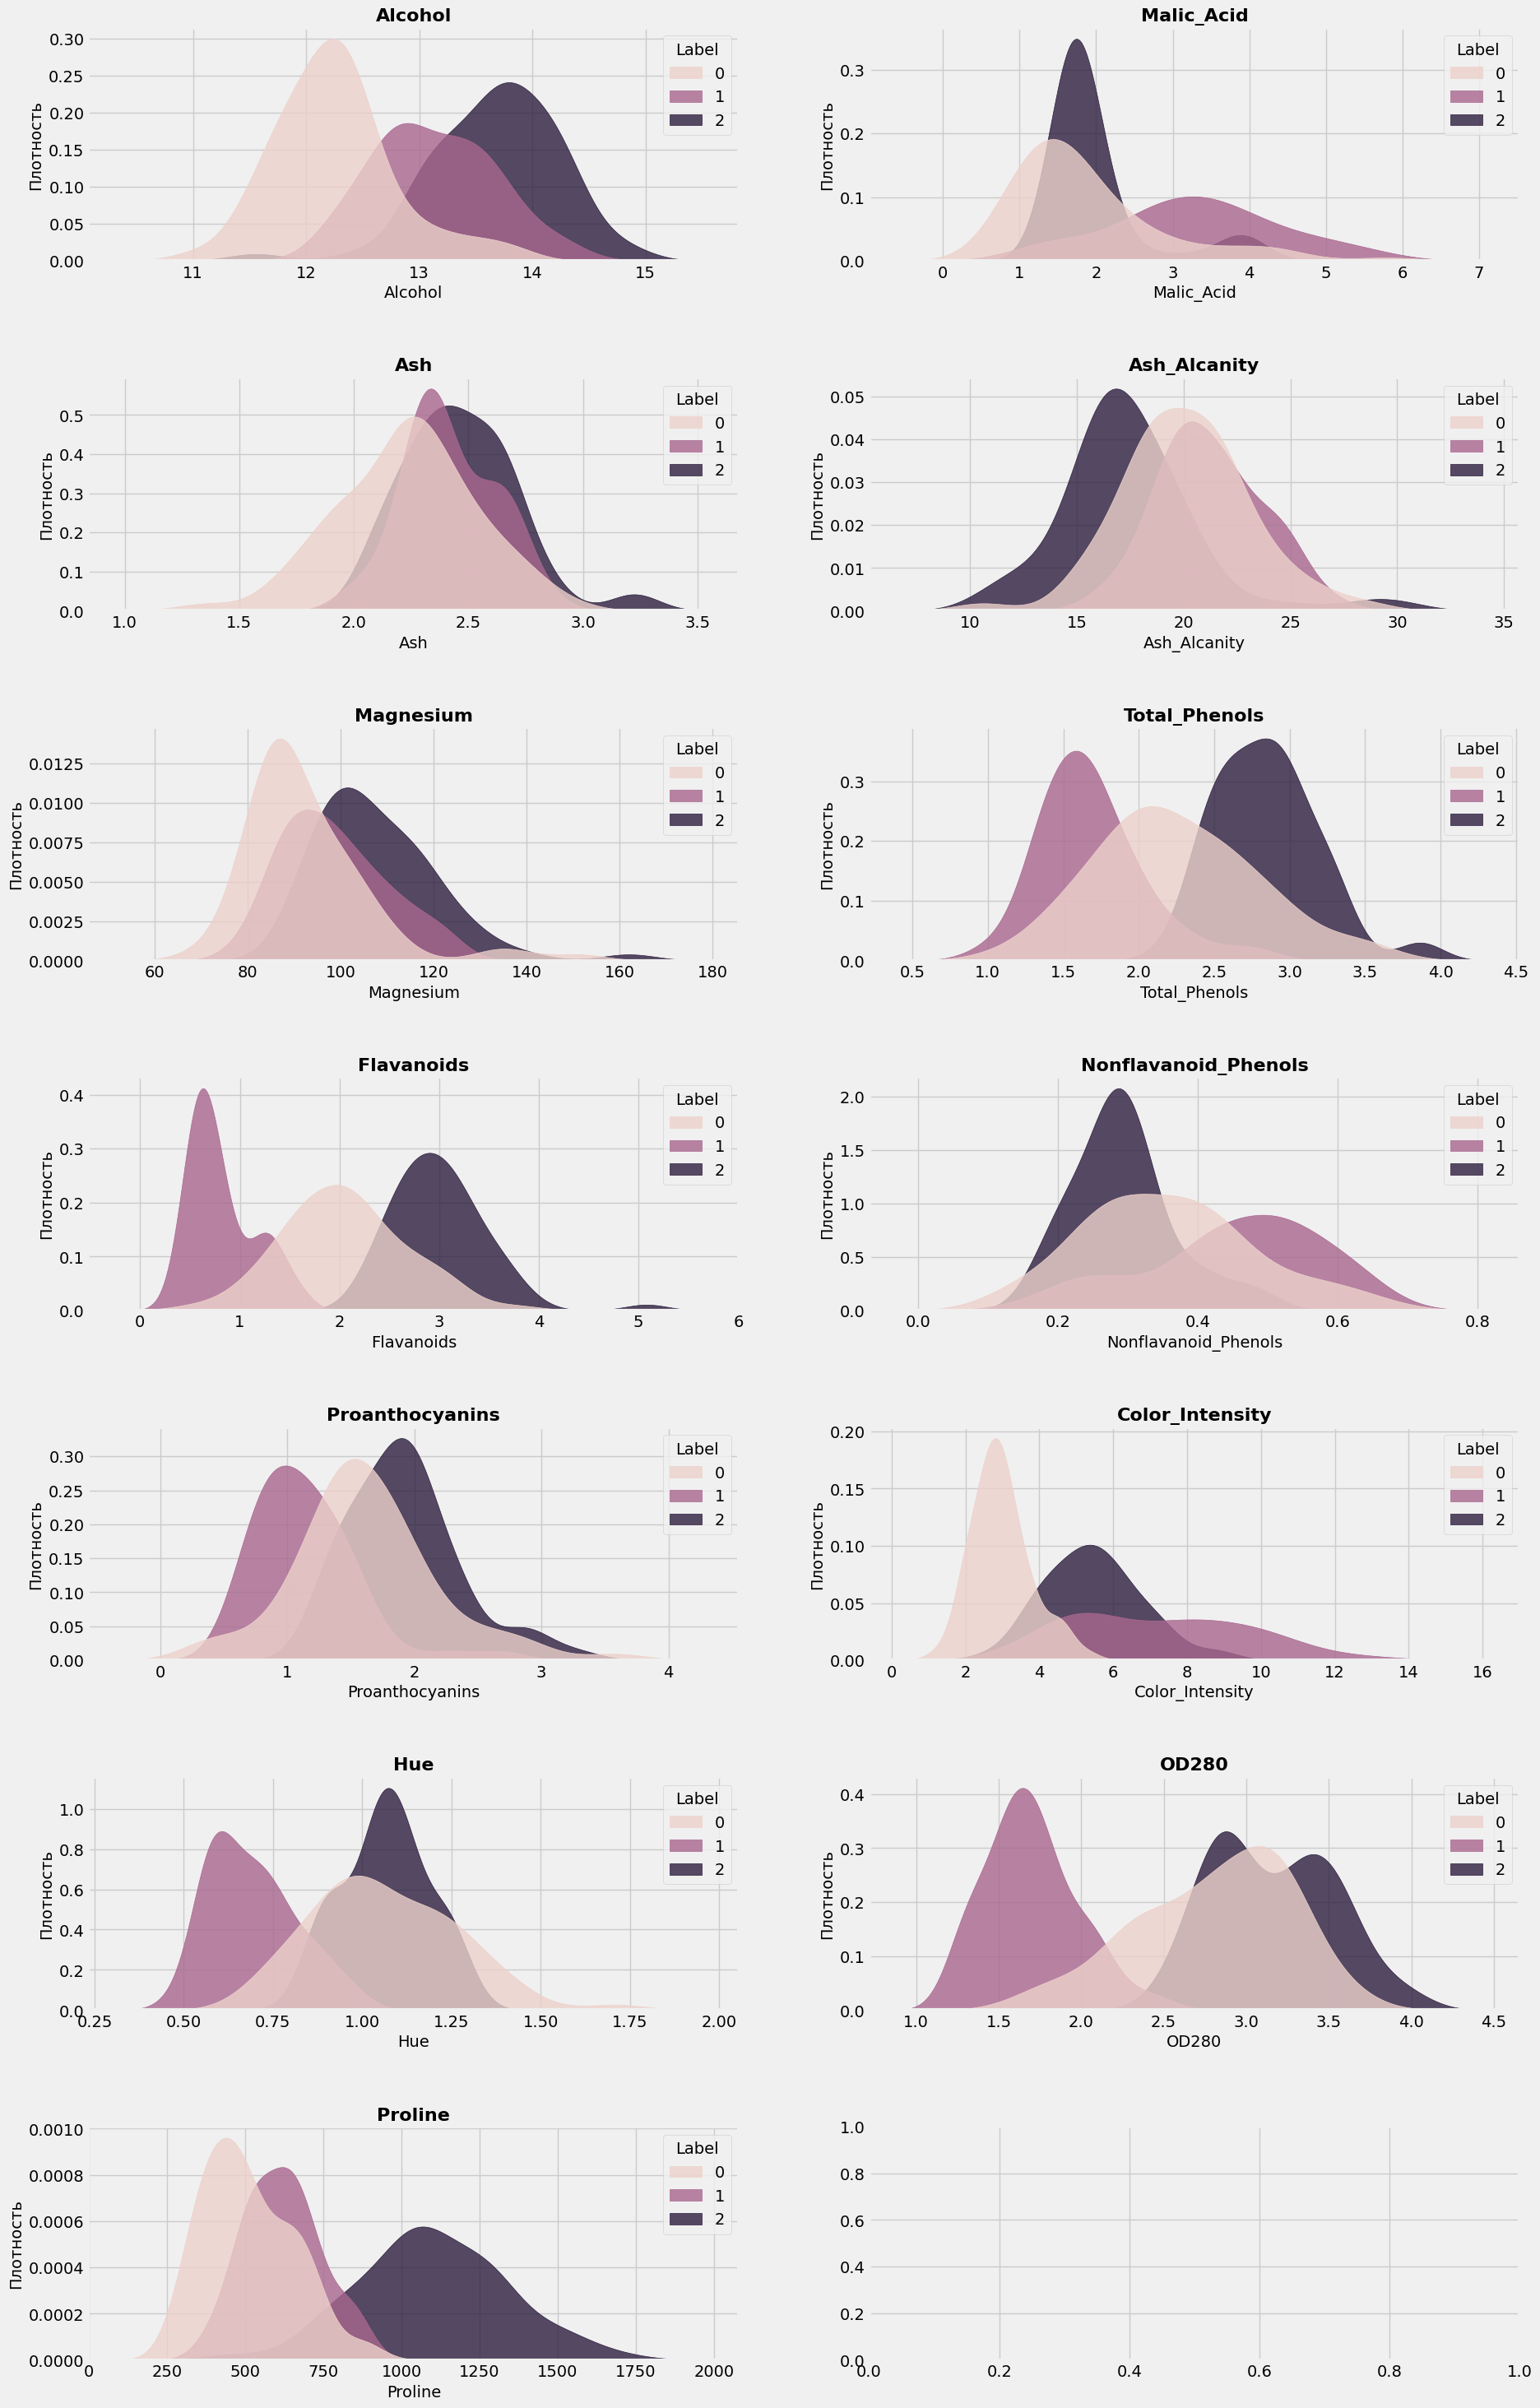

In [19]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns[:-1]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                hue = 'Label',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

### Средние значения для каждого кластера по явным категориям

In [20]:
df_mean = df.groupby('Label').agg({'Alcohol' : 'mean',
                         'Total_Phenols' : 'mean',
                         'Flavanoids' : 'mean',
                         'Proanthocyanins' : 'mean',
                         'Color_Intensity' : 'mean',
                         'Proline' : 'mean'})

df_mean.index.name = None
df_mean = round(df_mean,2)
df_mean

,Alcohol,Total_Phenols,Flavanoids,Proanthocyanins,Color_Intensity,Proline
0,12.25,2.25,2.05,1.62,2.97,510.17
1,13.13,1.68,0.82,1.15,7.23,619.06
2,13.68,2.85,3.00,1.92,5.45,1100.23


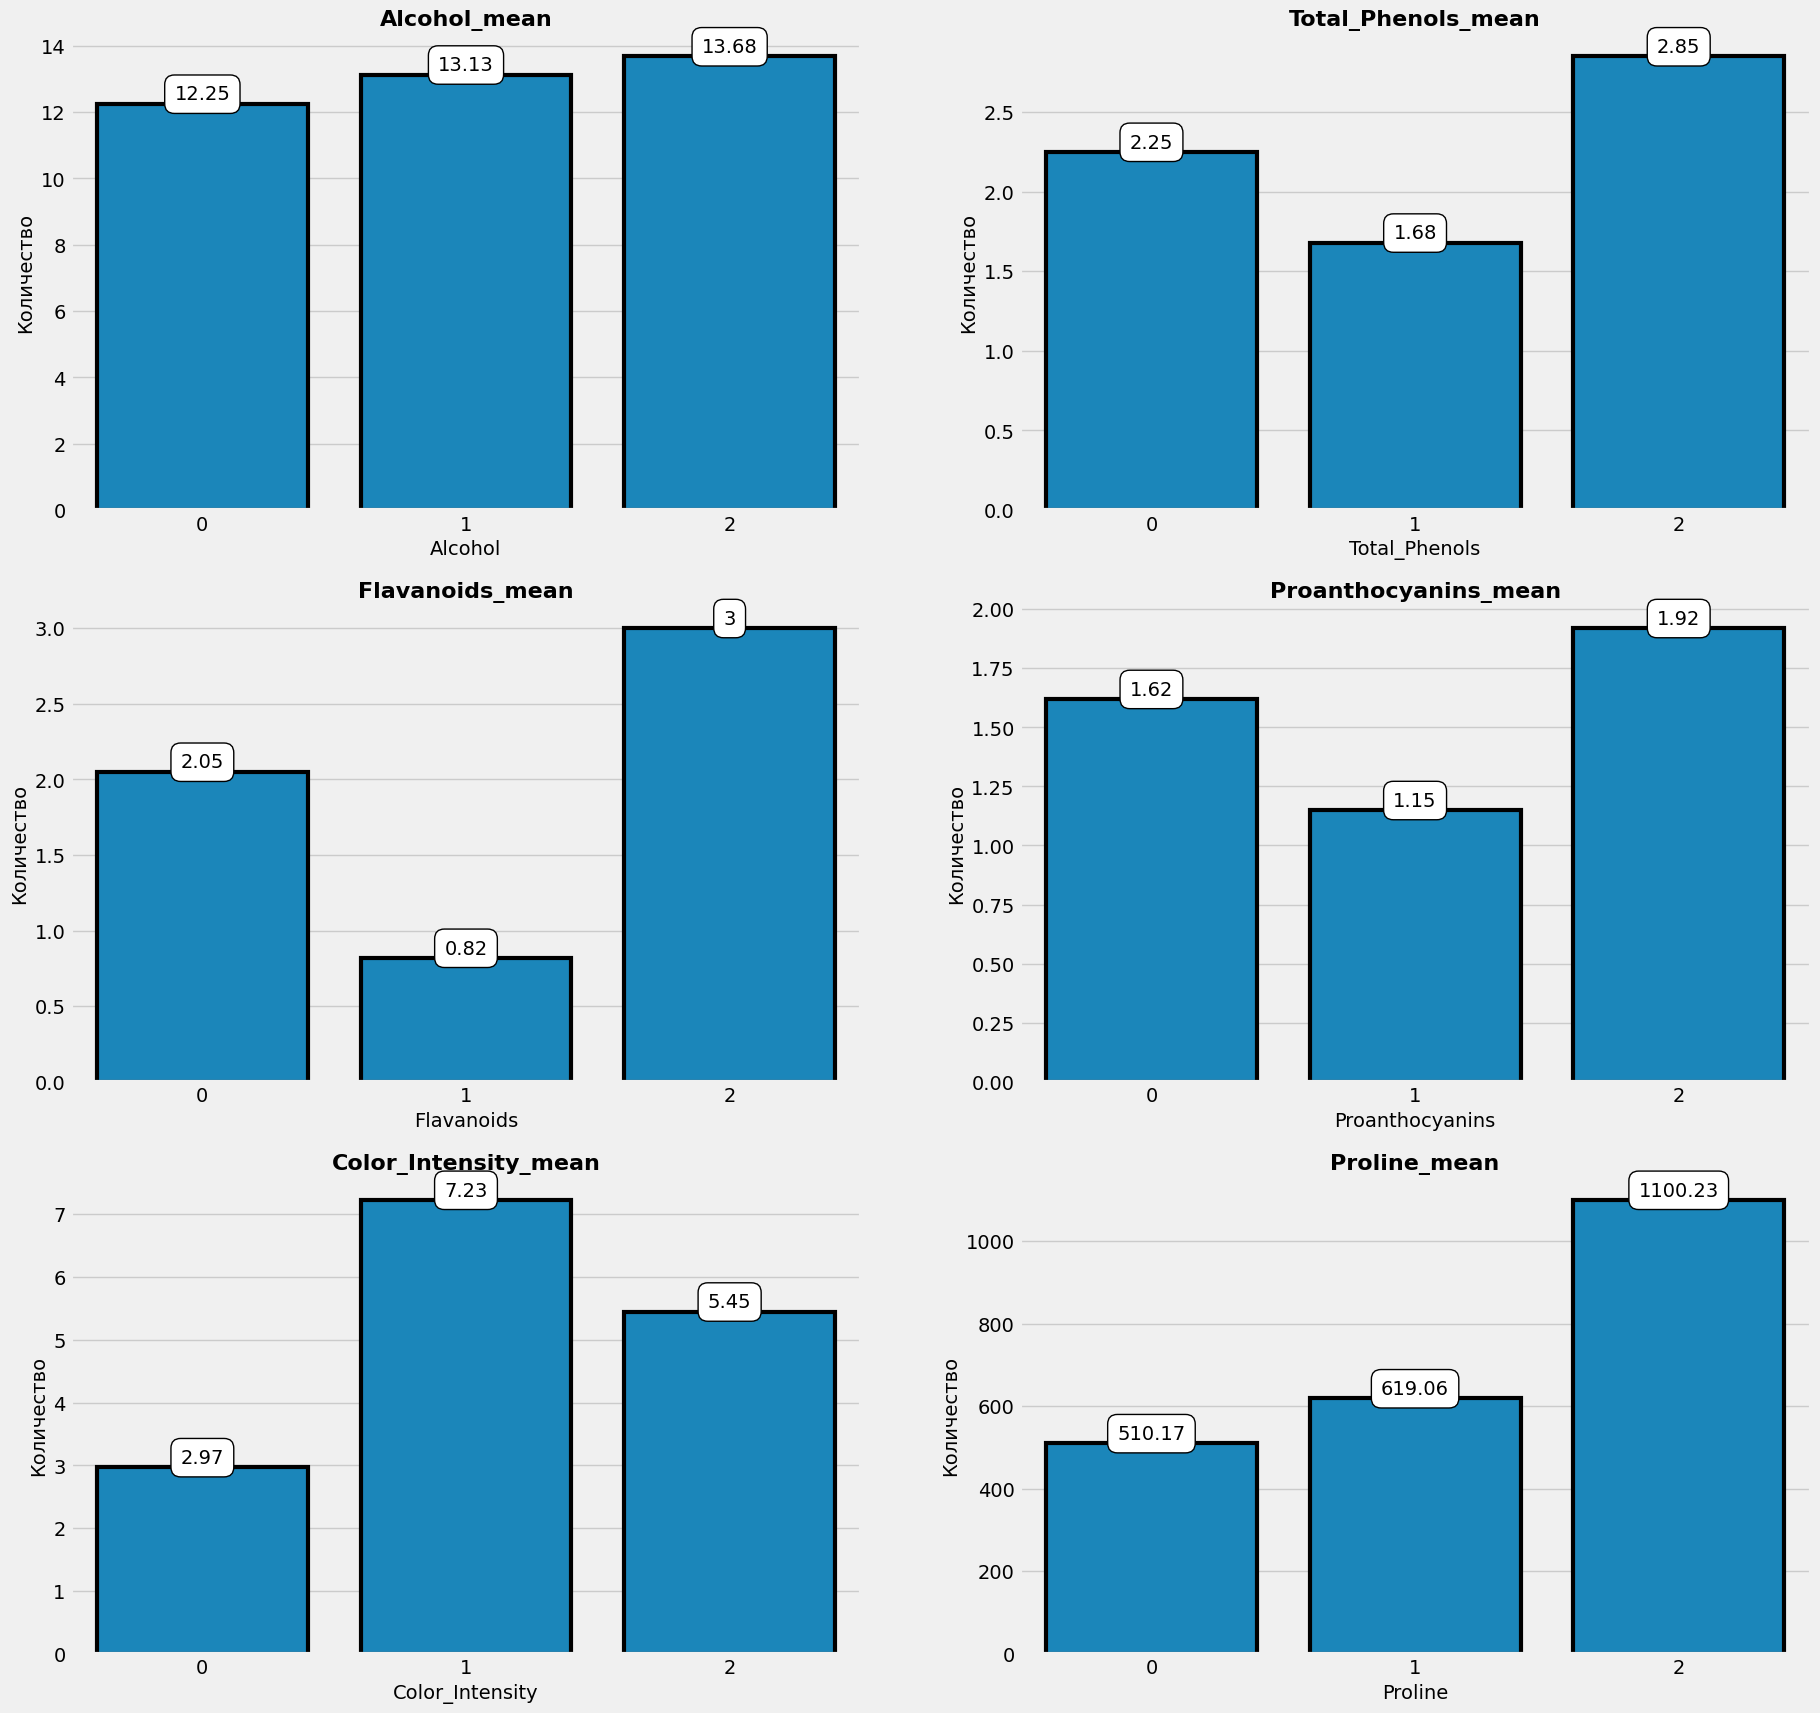

In [21]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(3,2, figsize = (20,20))

# Расстояние между графиками

# Список значений признаков для цикла
columns = df_mean.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    p1 = sns.barplot(data = df_mean,
                x = df_mean.index,
                y = column,
                linewidth = 3,
                edgecolor = 'black',
                ax = ax)
    p1.bar_label(p1.containers[0], bbox = bbox)
    
    ax.set_title(f'{column}_mean', fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Количество', fontsize = 14)
    

plt.show()

### Выводы (самые явные различия между кластерами)

    1. Можно четко выделить различия между кластерами по колонке Alcohol
        Например в 0 классе вина преобладает значения алкоголя равное 12
        В 1 классе вину преобладает значение алкоголя равное 13 (что больше чем в 0 классе)
        В 2 классе вину преобладает значение алкоголя равное 14 (что больше чем в 1 классе)
        
        То есть можно сделать вывод  по данному графику, что в данном наборе данных существует 3 категории вина, с разным содержанием алкоголя 
    
    2. Так же существуют различия между классаии в признаке total_phenols 
    в 0 классе меньше всего 
    во 2 клаасе - это значение больше всего
    
    3. Flavanoids
    в 0 классе преобладает значение 0,5
    в 1 классе преобладает значение 2
    во 2 классе преобладает значение 3
    
    В целом по каждому признаку есть небольшие отличия между тремя классами вина
    
    
    Составим типовой портрет каждого класса вина
    
    
    для 0 класса вино будет следующим:
    
    содержание 'Alcohol' 12 
    'Malic_Acid' низкое (в диапазоне от 0 до 3)
    'Magnesium' низкое (до 80 до 100)
    'Total_Phenols' 2 
    'Flavanoids' 2 
    'Color_Intensity' низкое (то есть цвет менее насыщенный относительно других вин) 
    Значение в диапазоне от 0 до 3
    'Proline' низакое (в диапазоне от 250 до 500)
    
    Так же можно посмотреть и другие зарактеристика других вин, что можно сделать самостоятельно

# DBSCAN

In [23]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [24]:
dbscan = DBSCAN(eps=11, min_samples=4)
dbscan_labels = dbscan.fit_predict(df)


In [25]:
dbscan_labels

array([-1,  1, -1, -1, -1, -1,  0, -1,  1,  1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  4,  2, -1, -1,  3, -1,  2,  4,  4,
       -1, -1, -1,  3, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  4,  4,
       -1,  4, -1,  2, -1,  4, -1,  4, -1, -1, -1, -1,  3,  6,  3, -1, -1,
       -1,  3,  2, -1,  4,  4, -1,  2, -1, -1, -1, -1,  5,  3,  4, -1,  5,
       -1, -1, -1, -1,  5,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4, -1, -1, -1, -1,  4, -1, -1, -1,  3, -1,  6, -1, -1, -1, -1,
        2, -1, -1, -1, -1,  6, -1,  4,  2, -1,  2, -1,  4, -1,  2, -1, -1,
        4, -1,  6, -1, -1, -1, -1, -1], dtype=int64)

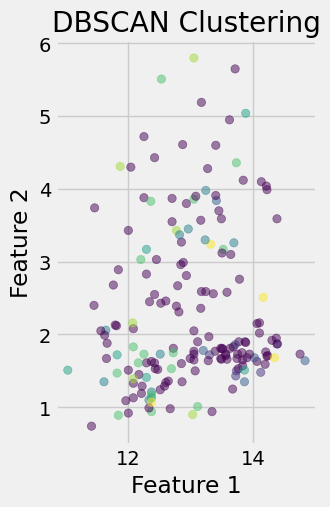

In [26]:
plt.figure(figsize=(3, 5))

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [36]:
X = df.drop(columns='Label')
y = df['Label']

In [174]:
from sklearn.metrics import silhouette_score, make_scorer

from sklearn.base import BaseEstimator, ClusterMixin

param_grid = {
    'eps': np.linspace(0.1, 20.0, 100),
    'min_samples': [i for i in range(16, 51)]  
}

def silhouette_scorer(estimator, X, y=None):
    labels = estimator.fit_predict(X)
    valid_labels = labels[labels != -1]  # Игнорируем шум
    
    if len(np.unique(valid_labels)) < 2:
        return -1  # Нельзя вычислить score для 0 или 1 кластера
    return silhouette_score(X[labels != -1], valid_labels)

class DBSCANWrapper(BaseEstimator, ClusterMixin):
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean'):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric  # Добавляем параметр metric
        self.labels_ = None

    def fit(self, X, y=None):
        self.dbscan_ = DBSCAN(
            eps=self.eps,
            min_samples=self.min_samples,
            metric=self.metric  # Передаем параметр metric
        )
        self.labels_ = self.dbscan_.fit_predict(X)
        return self

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

search = GridSearchCV(
    estimator=DBSCANWrapper(),
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer),
    cv=3,
    n_jobs=-1,
    verbose=2
)

search

GridSearchCV(cv=3, estimator=DBSCANWrapper(), n_jobs=-1,
             param_grid={'eps': array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
                         'min_samples': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                                         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, ...]},
             scoring=make_scorer(silhouette_scorer, response_method='predict'),
             verbose=2)

In [175]:
search.fit(X)

# Результаты
print("Лучшие параметры:", search.best_params_)
print("Лучший Silhouette Score:", search.best_score_)

Fitting 3 folds for each of 3500 candidates, totalling 10500 fits
Лучшие параметры: {'eps': 0.1, 'min_samples': 16}
Лучший Silhouette Score: nan


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


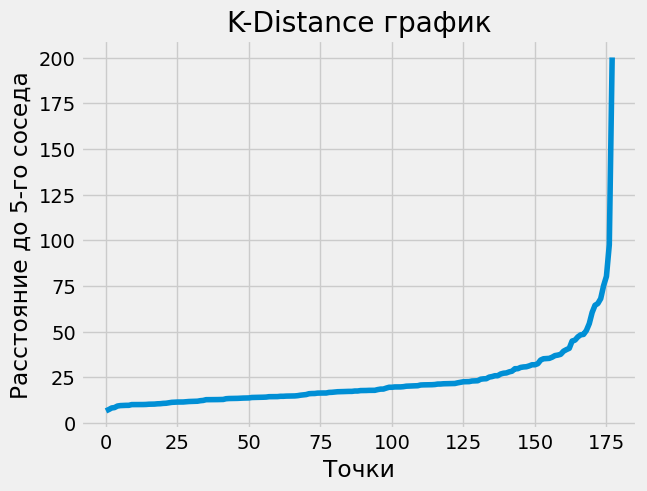

In [178]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, _ = nbrs.kneighbors(X)
plt.plot(np.sort(distances[:, 4]))
plt.xlabel('Точки')
plt.ylabel('Расстояние до 5-го соседа')
plt.title('K-Distance график')
plt.show()


Ищите резкий "локоть" на графике (точку, где расстояния начинают резко расти). Это оптимальное значение для eps.

Базовый выбор:
min_samples = 2 * размерность_данных (например, для 2D → min_samples=4).

Для шумных данных:
Увеличьте до 5-10, чтобы снизить ложные кластеры.

In [183]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)

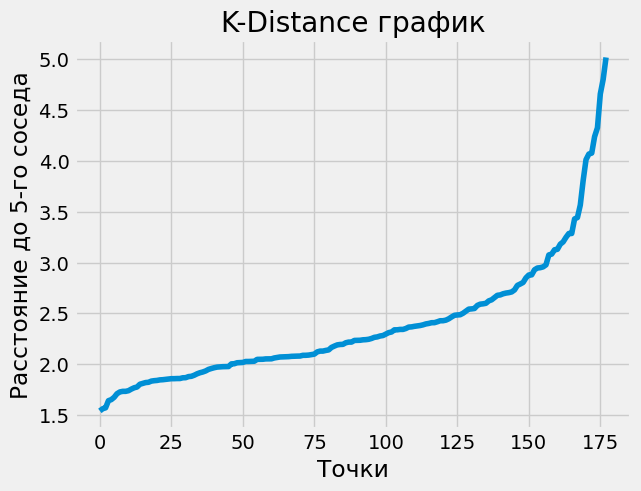

In [186]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
plt.plot(np.sort(distances[:, 4]))
plt.xlabel('Точки')
plt.ylabel('Расстояние до 5-го соседа')
plt.title('K-Distance график')
plt.show()


In [215]:
import optuna

def objective(trial):
    eps = trial.suggest_float('eps', 0.1, 90.0)
    min_samples = trial.suggest_int('min_samples', 2, 250)
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_scaled)
    return silhouette_score(X_scaled, labels) if len(np.unique(labels)) > 1 else -1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-03-14 22:29:08,473] A new study created in memory with name: no-name-0fd34eb2-5527-43e0-adf6-746cd0751c2f
[I 2025-03-14 22:29:08,478] Trial 0 finished with value: -1.0 and parameters: {'eps': 62.35128503154032, 'min_samples': 116}. Best is trial 0 with value: -1.0.
[I 2025-03-14 22:29:08,485] Trial 1 finished with value: -1.0 and parameters: {'eps': 75.83262841733436, 'min_samples': 152}. Best is trial 0 with value: -1.0.
[I 2025-03-14 22:29:08,493] Trial 2 finished with value: -1.0 and parameters: {'eps': 22.295857054795427, 'min_samples': 61}. Best is trial 0 with value: -1.0.
[I 2025-03-14 22:29:08,499] Trial 3 finished with value: -1.0 and parameters: {'eps': 33.80508162461367, 'min_samples': 141}. Best is trial 0 with value: -1.0.
[I 2025-03-14 22:29:08,505] Trial 4 finished with value: -1.0 and parameters: {'eps': 10.388172832710442, 'min_samples': 29}. Best is trial 0 with value: -1.0.
[I 2025-03-14 22:29:08,509] Trial 5 finished with value: -1.0 and parameters: {'eps': 

In [217]:
study.best_params

{'eps': 62.35128503154032, 'min_samples': 116}

In [218]:
db = DBSCAN(eps=62.35, min_samples=116).fit(X_scaled)

In [219]:
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [220]:
from sklearn.cluster import HDBSCAN

db = HDBSCAN().fit(X_scaled) # автоматически подбирает eps

In [221]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [54]:
np.linspace(0.1, 5.0, 20)

array([0.1       , 0.35789474, 0.61578947, 0.87368421, 1.13157895,
       1.38947368, 1.64736842, 1.90526316, 2.16315789, 2.42105263,
       2.67894737, 2.93684211, 3.19473684, 3.45263158, 3.71052632,
       3.96842105, 4.22631579, 4.48421053, 4.74210526, 5.        ])

In [62]:
eps_list = np.linspace(0.1, 5.0, 20),

min_samples_list = [i for i in range(2, 21)] 

siluette = [] 
labs = []
eps_l = []
min_sampl_l = []

for eps in np.linspace(0.1, 10.0, 30):
    for min_sampl in range(2, 51):
        # print(eps, min_sampl)
        model_dbscan = DBSCAN(eps=eps, min_samples=min_sampl)
        labels = model_dbscan.fit_predict(X)
        print(labels)
        if(len(np.unique(labels)) >= 2):
            # silhouette_score(X, labels)
            siluette.append(silhouette_score(X, labels))
            labs.append(labels)
            eps_l.append(eps)
            min_sampl_l.append(min_sampl)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 

In [65]:
siluette[4]

-0.6724481105749336

In [68]:
labs[4]

array([-1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  3,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1,  5, -1, -1,  6, -1,
       -1, -1, -1, -1,  6, -1, -1, -1], dtype=int64)

In [67]:
eps_l[4]

4.196551724137931

In [66]:
min_sampl_l[4]

2

In [110]:
df.shape

(178, 15)

In [125]:
db = DBSCAN(eps=4.196, min_samples=2).fit(df)

In [126]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  3,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1,  5, -1, -1,  6, -1,
       -1, -1, -1, -1,  6, -1, -1, -1], dtype=int64)

In [127]:
adjusted_rand_score(db.labels_, y)

0.002178284993846653

# Agglomerative

In [100]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
cluster_agg = agg_cluster.fit_predict(X)
cluster_agg

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int64)

In [101]:
y1 = agg_cluster.fit_predict(df)

In [102]:
result_df = X
result_df['Labels'] = y1

In [103]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label,Label Agg
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,3
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,3
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,3
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,2


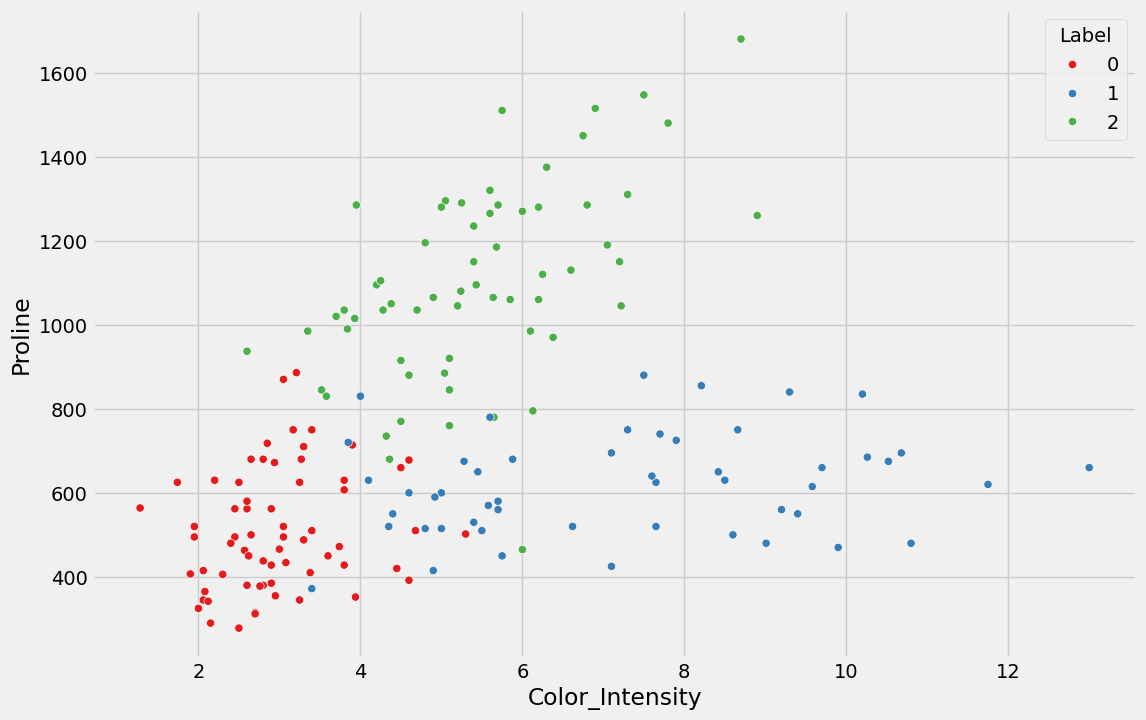

In [104]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Color_Intensity', y='Proline', hue='Label', 
                data=df, palette='Set1')
plt.show()

In [105]:
adjusted_rand_score(cluster_agg, y)

0.26783625269765016

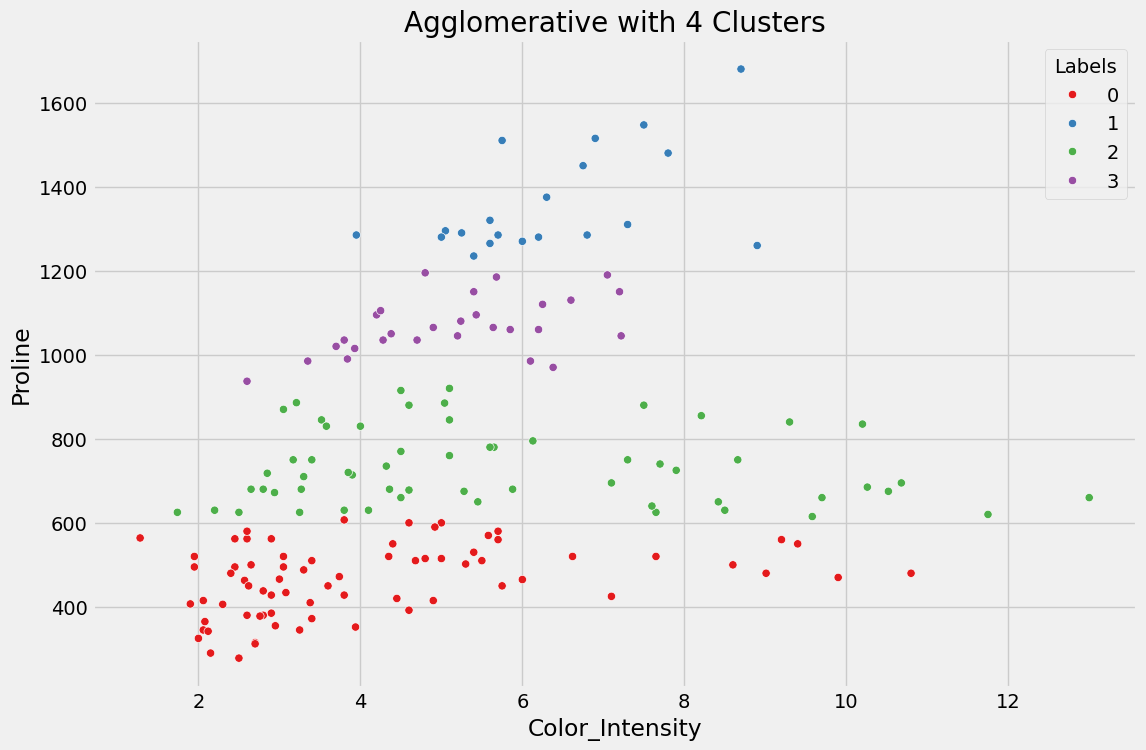

In [89]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Color_Intensity', y='Proline', hue='Labels', 
                data=result_df, palette='Set1')
plt.title('Agglomerative with 4 Clusters')
plt.show()

In [ ]:
df['Label Agg'] = cluster_agg

In [81]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label,Label Agg
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,3
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,3
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,3
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,2


In [93]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
cluster_agg = agg_cluster.fit_predict(X)
cluster_agg

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [94]:
result_df = X
result_df['Labels'] = cluster_agg

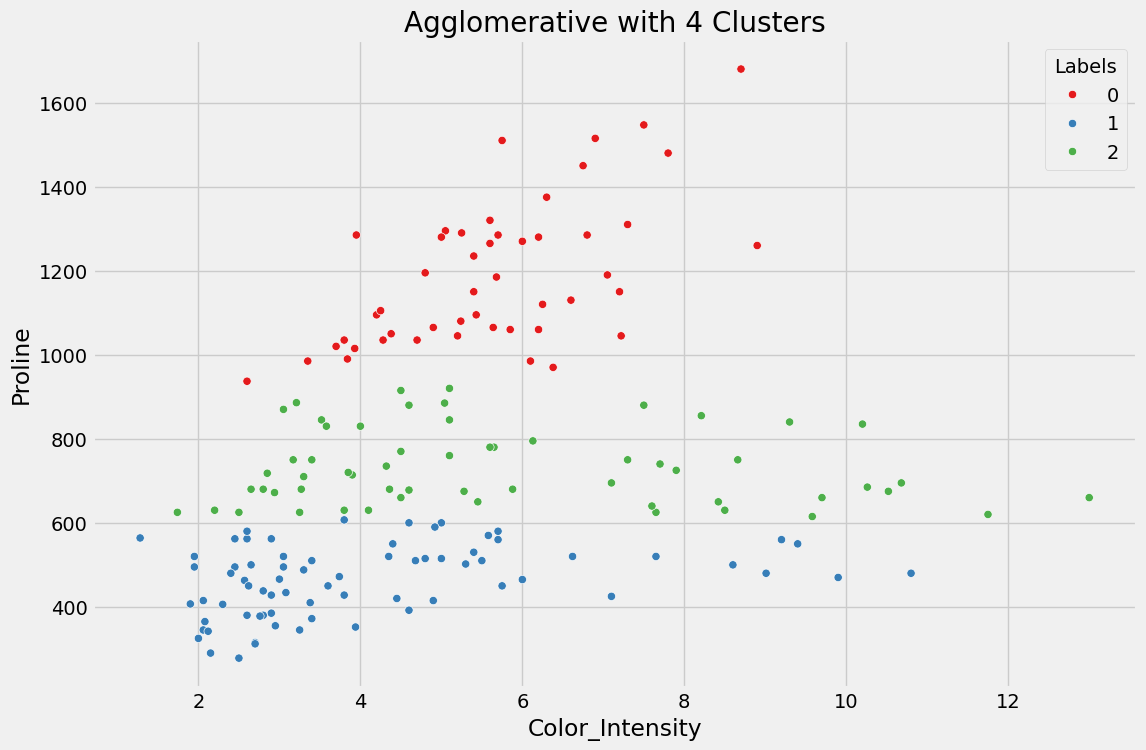

In [95]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Color_Intensity', y='Proline', hue='Labels', 
                data=result_df, palette='Set1')
plt.title('Agglomerative with 4 Clusters')
plt.show()

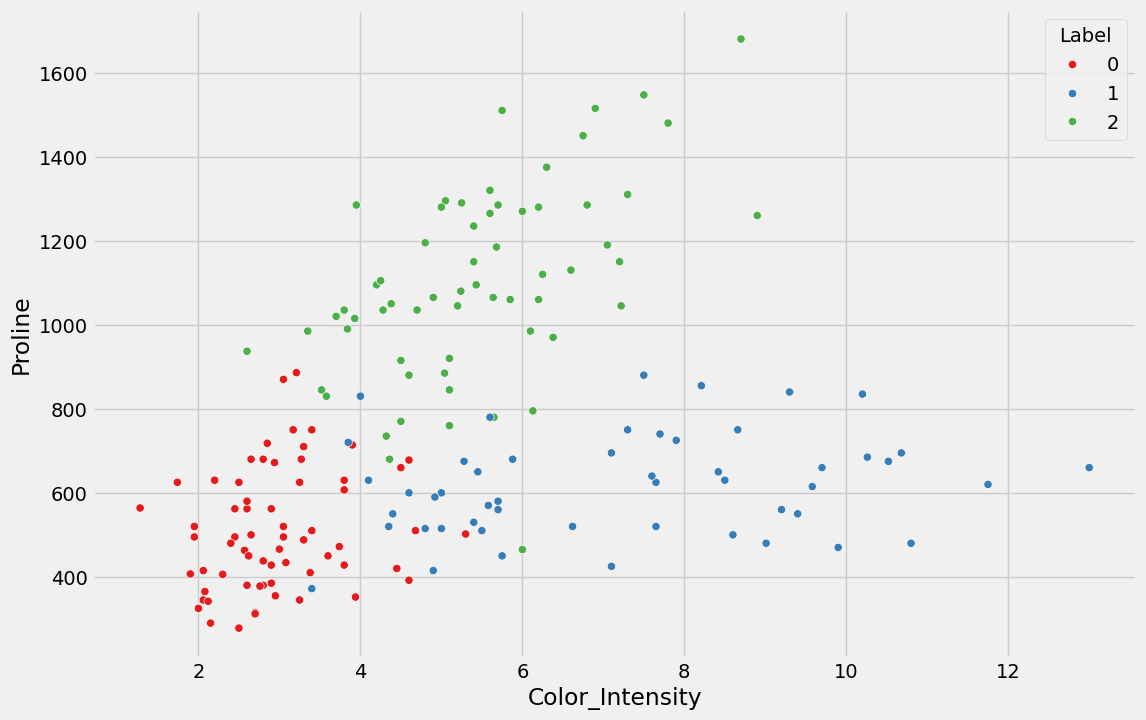

In [96]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Color_Intensity', y='Proline', hue='Label', 
                data=df, palette='Set1')
plt.show()

In [99]:
adjusted_rand_score(cluster_agg, y)

0.3669956685981017

# Заменим настройки для Агломеративной

In [130]:
hc = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='complete')
hc.fit(df)


df['Cluster_HC'] = hc.labels_
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Cluster_HC
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [135]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'Cluster_HC'],
      dtype='object')

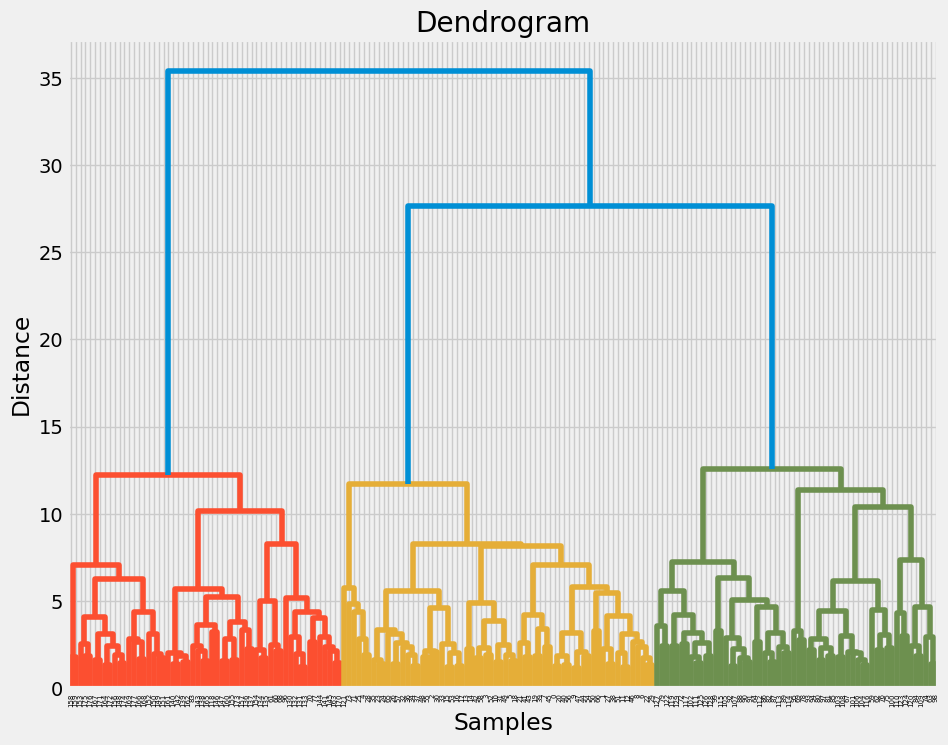

In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Perform hierarchical clustering using linkage
Z = linkage(scaled_data, method='ward')  # 'ward' minimizes the variance of merged clusters

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

# Сохранение графика в формате PNG
plt.savefig("dendrogram.png", dpi=300, bbox_inches='tight', format='png')
plt.show()